No sentence-transformers model found with name /data1/dxw_data/llm/text2vec-large-chinese. Creating a new one with MEAN pooling.


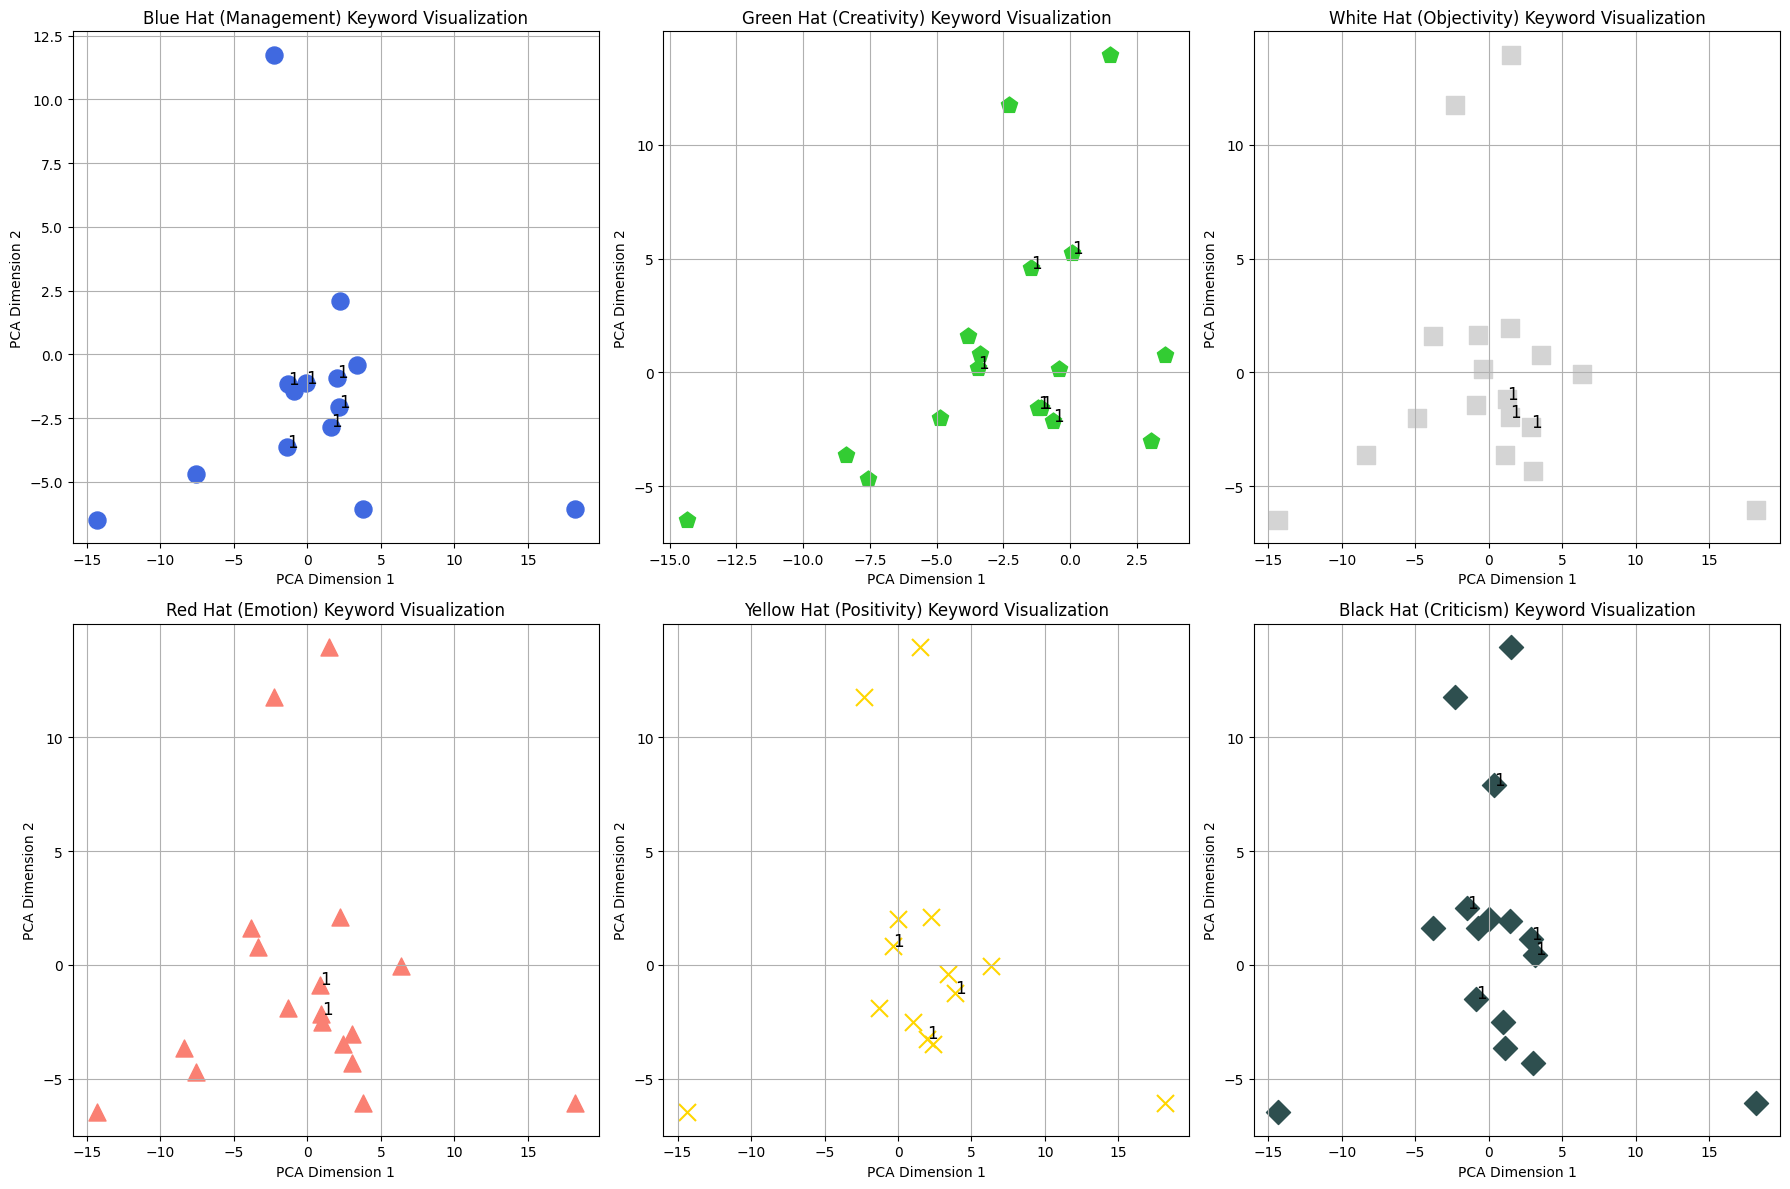

In [10]:
import json
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer
from collections import defaultdict

# 加载text2vec-large-chinese模型
model = SentenceTransformer('/data1/dxw_data/llm/text2vec-large-chinese')

# 定义每个Agent的所有Topic的关键词（从多个Topic合并）
merged_keywords = {
    "蓝色思考帽(管理)": ["思考", "创新", "情感", "提出", "产品", "黄色", "黑色", "市场", "客观", "红色", "分析", "期望", "顺序", "白色"],
    "绿色思考帽(创新)": ["创新", "设计", "功能", "手环", "产品", "用户", "社交", "智能", "思考", "吸引", "环保", "想法", "合作", "跨界", "品牌", "元素", "增加"],
    "白色思考帽(客观)": ["产品", "创新", "想法", "关注", "营销", "提出", "元素", "用户", "策略", "市场", "合作", "功能", "角度", "过程", "设计", "成本", "需求", "媒体"],
    "红色思考帽(情感)": ["需求", "产品", "市场", "期望", "创新", "讨论", "情感", "想法", "优势", "思考", "社交", "关注", "注重", "吸引", "设计", "机会", "视频", "功能"],
    "黄色思考帽(积极)": ["市场", "机会", "优势", "需求", "讨论", "产品", "提供", "期望", "创新", "确保", "劣势", "功能", "分析", "群体"],
    "黑色思考帽(批判)": ["产品", "创新", "确保", "市场", "设计", "成本", "过程", "关注", "策略", "开发", "功能", "质量", "讨论", "控制", "性能", "带来"]
}

# 中文 agent 名称与英文的映射和对应的颜色
agent_name_map = {
    "蓝色思考帽(管理)": "Blue Hat (Management)",
    "绿色思考帽(创新)": "Green Hat (Creativity)",
    "白色思考帽(客观)": "White Hat (Objectivity)",
    "黄色思考帽(积极)": "Yellow Hat (Positivity)",
    "红色思考帽(情感)": "Red Hat (Emotion)",
    "黑色思考帽(批判)": "Black Hat (Criticism)"
}

# 计算每个关键词被多少个 agent 用到
keyword_count = defaultdict(int)
for agent, words in merged_keywords.items():
    for word in words:
        keyword_count[word] += 1

# 计算每个关键词的embedding
all_keywords = []
labels = []
agent_names = []

for agent, words in merged_keywords.items():
    for word in words:
        all_keywords.append(word)
        labels.append(word)
        agent_names.append(agent)

# 将关键词转为embedding向量
embeddings = model.encode(all_keywords)

# 使用PCA将维度降到2D（可以用t-SNE替代）
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

# 颜色定义
colors = {
    "蓝色思考帽(管理)": (0.25, 0.41, 0.88),  # royalblue
    "白色思考帽(客观)": (0.83, 0.83, 0.83),  # lightgray
    "红色思考帽(情感)": (0.98, 0.5, 0.45),  # Salmon
    "绿色思考帽(创新)": (0.2, 0.8, 0.2),  # LimeGreen
    "黄色思考帽(积极)": (1.0, 0.84, 0.0),  # Gold
    "黑色思考帽(批判)": (0.18, 0.31, 0.31)  # DarkSlateGray
}

# 符号定义
markers = {
    "蓝色思考帽(管理)": "o",   # 圆圈
    "白色思考帽(客观)": "s",   # 正方形
    "红色思考帽(情感)": "^",   # 三角形
    "绿色思考帽(创新)": "p",   # 五角星
    "黄色思考帽(积极)": "x",   # 叉
    "黑色思考帽(批判)": "D"    # 菱形
}

# 创建一个2行3列的图布局
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()  # 将2D数组展平成1D方便迭代

# 为每个Agent生成单独的图，并放置在2行3列的布局中
for idx, (agent, agent_keywords) in enumerate(merged_keywords.items()):
    # 过滤属于该agent的关键词和embedding
    agent_embeddings = []
    agent_labels = []
    
    for i, word in enumerate(labels):
        if agent_names[i] == agent:
            agent_embeddings.append(embeddings_2d[i])
            agent_labels.append(word)
    
    agent_embeddings = np.array(agent_embeddings)
    
    # 绘制点
    for i in range(len(agent_embeddings)):
        word = agent_labels[i]
        axes[idx].scatter(agent_embeddings[i, 0], agent_embeddings[i, 1], color=colors[agent], marker=markers[agent], s=150)
        
        # 如果这个关键词是唯一的（只出现在这个Agent中），标注数字"1"
        if keyword_count[word] == 1:
            axes[idx].text(agent_embeddings[i, 0] + 0.01, agent_embeddings[i, 1] + 0.01, '1', fontsize=12, color='black')
    
    # 设置图的标题
    agent_english_name = agent_name_map[agent]
    axes[idx].set_title(f'{agent_english_name} Keyword Visualization')
    axes[idx].set_xlabel('PCA Dimension 1')
    axes[idx].set_ylabel('PCA Dimension 2')
    axes[idx].grid(True)

# 调整布局并保存为图片
plt.tight_layout()
plt.savefig('topic_all.png')
plt.show()
